In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
# 1. 폰트를 'Malgun Gothic'으로 설정
plt.rc('font', family='Malgun Gothic')

# 2. 마이너스 기호 깨짐 방지 설정
plt.rcParams['axes.unicode_minus'] = False

In [3]:
#교수님이 주신 코드
my_predictions = {}
my_pred = None
my_actual = None
my_name = None

min_mse = None
best_pred = None
best_actual = None
best_name = None 

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    plot_predictions(name_, pred, actual)
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name , best_name , best_actual , best_pred, min_mse

    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    if min_mse == None:
        min_mse = mse
        best_name = my_name
        best_actual = my_actual
        best_pred = my_pred

    else:
        if mse < min_mse:
            min_mse = mse
            best_name = my_name
            best_actual = my_actual
            best_pred = my_pred

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
  
    global my_predictions, my_pred, my_actual, my_name , best_name , best_actual , best_pred, min_mse
    plot_predictions(best_name, best_pred, best_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

| Column Name | Variable Name             | Content                                      |
|-------------|----------------------------|----------------------------------------------|
| laufkont    | status                     | 신용 신청자의 은행 계좌  잔고상태 (서순형)         |
| laufzeit    | duration                   | 대출 기간 (월 단위, 양적 변수)               |
| moral       | credit_history             | 과거 및 현재의 신용 계약 이행 이력 (서순형)  |
| verw        | purpose                    | 대출 목적 (명목형)                           |
| hoehe       | amount                     | 대출 금액 (양적 변수; 단조 변환 결과)        |
| sparkont    | savings                    | 신용 신청자의 저축 상태 (서순형)             |
| beszeit     | employment_duration        | 현재 고용주와의 고용 기간 (서열형)           |
| rate        | installment_rate           | 가처분 소득 대비 할부 비율 (서열형)          |
| famges      | personal_status_sex        | 결혼 상태와 성별의 결합 정보 (범주형)        |
| buerge      | other_debtors              | 추가 채무자 또는 보증인이 있는지 여부 (범주형)|
| wohnzeit    | present_residence          | 현재 거주지에 거주한 기간 (서열형)           |
| verm        | property                   | 가장 가치 있는 자산 (서열형)                 |
| alter       | age                        | 나이 (양적 변수)                             |
| weitkred    | other_installment_plans    | 다른 기관의 할부 계획 존재 여부 (범주형)     |
| wohn        | housing                    | 주거 형태 (서순형)                           |
| bishkred    | number_credits             | 해당 은행에서 현재 및 과거에 보유한 대출 수 (서열형) |
| beruf       | job                        | 직업 수준 (서열형)                           |
| pers        | people_liable              | 신용 신청자의 부양 가족 수 (이진형)          |
| telef       | telephone                  | 신용 신청자 명의로 등록된 전화선 여부 (이진형)|
| gastarb     | foreign_worker             | 외국인 노동자인지 여부 (이진형)              |
| kredit      | credit_risk                | 신용 위험 (양호 또는 불량)       1:good, 0: bad            |


In [4]:
df = pd.read_csv('dataset\\SouthGermanCredit.csv')
df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2,0


In [5]:
# 컬럼 이름 맵핑
df.columns = '''status
duration
credit_history
purpose
amount
savings
employment_duration
installment_rate
personal_status_sex
other_debtors
present_residence
property
age
other_installment_plans
housing
number_credits
job
people_liable
telephone
foreign_worker
credit_risk'''.split('\n')
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2,0


In [9]:
#결측치 확인
print(f'데이터셋 결측치 : {df.isnull().sum().sum()}')
print(f'데이터셋 중복 샘플 : {df.duplicated().sum()}')

데이터셋 결측치 : 0
데이터셋 중복 샘플 : 0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [11]:
# 기존 1 : 3~ more  , 2: 0 ~ 1 값으로 된 것을 반대로 맵핑하여 서순형에 맞춤
df['people_liable'] = df['people_liable'].map({1: 2, 2: 1})

In [50]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
status,1,1,2,1,1,1,1,1,4,2,1,1,1,2,1,1,1,2,2,4,1,2,2,2,1,2,1,2,4,3,3,4,4,4,1,1,4,4,4,4,4,1,4,2,2,1,4,4,4,1,4,

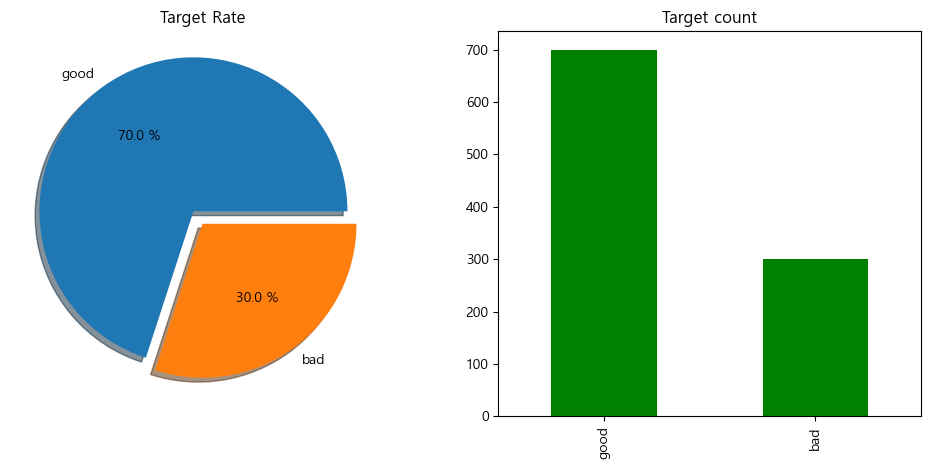

In [52]:
#타겟 분포 확인
f,a = plt.subplots(1,2,figsize= (12,5))
a[0].pie(df['credit_risk'].value_counts(),labels = ['good', 'bad'],shadow = True,explode = [0.1,0] ,autopct='%.1f %%');
a[0].set_title('Target Rate')
credit_risk_counts = df['credit_risk'].value_counts()
credit_risk_counts.index = ['good', 'bad']  # Setting custom labels for the index
credit_risk_counts.plot.bar(ax=a[1],color = 'g')
a[1].set_title('Target count');

# 불균형 존재

# 연속형 및 서순형
+ status
+ credit_history
+ duration
+ amount
+ employment_duration
+ installment_rate
+ present_residence
+ property
+ age
+ number_credits
+ job
+ people_liable -> 값이 두개지만 순서 있다
+ savings
+ housing

# 이진형

+ telephone
+ foreign_worker
+ credit_risk -> TARGET

# 명목형
+ purpose
+ personal_status_sex
+ other_debtors
+ other_installment_plans

# EDA

### purpose

+ 0: 기타 (others)
+ 1: 자동차 (신차 구매) (car (new))
+ 2: 자동차 (중고차 구매) (car (used))
+ 3: 가구 또는 장비 (furniture/equipment)
+ 4: 라디오 또는 텔레비전 (radio/television)
+ 5: 가전제품 (domestic appliances)
+ 6: 수리 (repairs)
+ 7: 교육 (education)
+ 8: 휴가 (vacation)
+ 9: 재교육 (retraining)
+ 10: 사업 (business)


In [39]:
df['purpose'].value_counts()

purpose
3     280
0     234
2     181
1     103
9      97
6      50
5      22
10     12
4      12
8       9
Name: count, dtype: int64

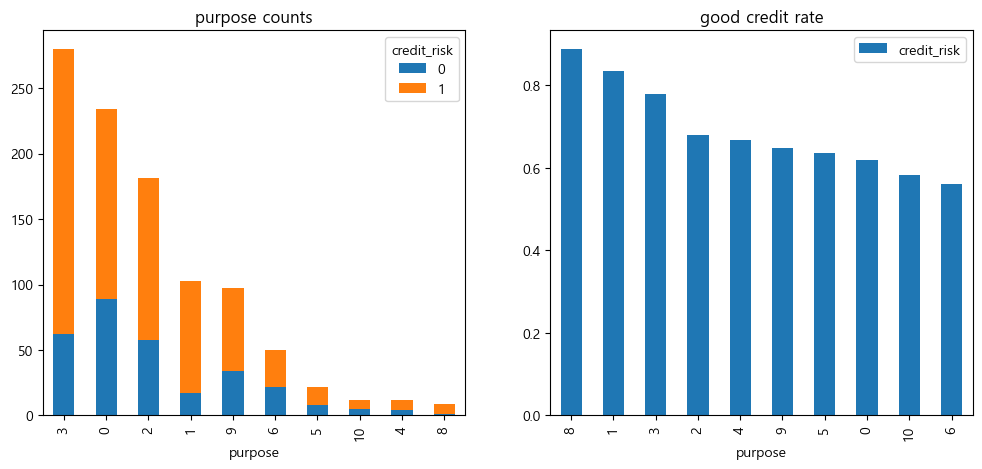

In [53]:
f,a = plt.subplots(1,2,figsize = (12,5))
df['purpose'].value_counts().plot.bar(ax = a[0])
a[0].set_title('purpose counts')
purpose_order = df['purpose'].value_counts().index  # 빈도 기준으로 정렬된 순서
# 그룹화된 데이터를 빈도순으로 정렬하여 시각화
df.groupby(by=['purpose', 'credit_risk']).size().unstack().loc[purpose_order].plot.bar(stacked=True,ax =a[0])
df[['purpose', 'credit_risk']].groupby(by=['purpose']).mean().sort_values(by = 'credit_risk',ascending = False).plot.bar(stacked=True,ax =a[1])
a[1].set_title('good credit rate');

# personal_status_sex

+ 1: 남성, 이혼 또는 별거 중 (male : divorced/separated)
+ 2: 여성, 비독신 (결혼 또는 이혼/별거/사별) 또는 남성, 독신 (female : non-single or male : single)
+ 3: 남성, 기혼 또는 사별 (male : married/widowed)
+ 4: 여성, 독신 (female : single)

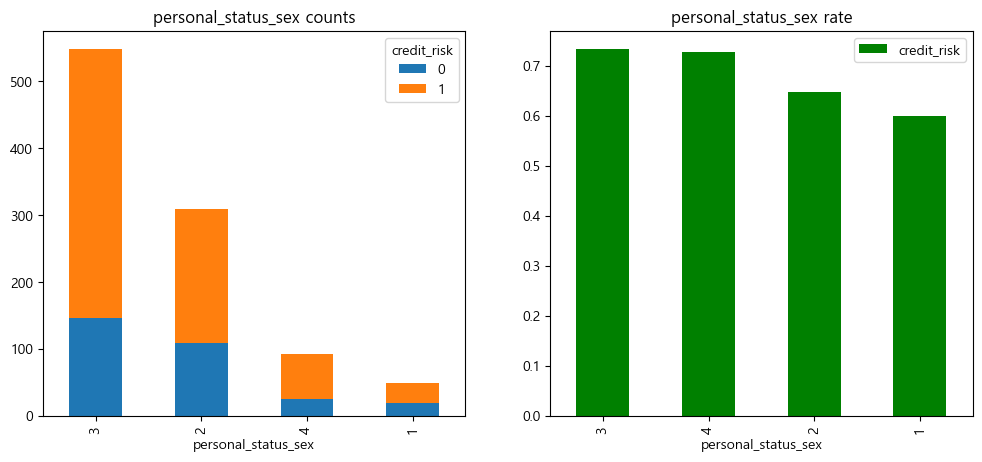

In [41]:
f,a = plt.subplots(1,2,figsize = (12,5))
a[0].set_title('personal_status_sex counts')
personal_status_sex_order = df['personal_status_sex'].value_counts().index 
df.groupby(by=['personal_status_sex', 'credit_risk']).size().unstack().loc[personal_status_sex_order].plot.bar(ax =a[0],stacked = True)
df[['personal_status_sex', 'credit_risk']].groupby(by=['personal_status_sex']).mean().sort_values(by = 'credit_risk',ascending = False).plot.bar(stacked=True,ax =a[1],color = 'g')
a[1].set_title('personal_status_sex rate');

# other_debtors

+ 1: 없음 (none) - 다른 채무자나 보증인이 없음
+ 2: 공동 신청자 (co-applicant) - 대출에 대한 공동 신청자가 있음
+ 3: 보증인 (guarantor) - 대출에 대한 보증인이 있음

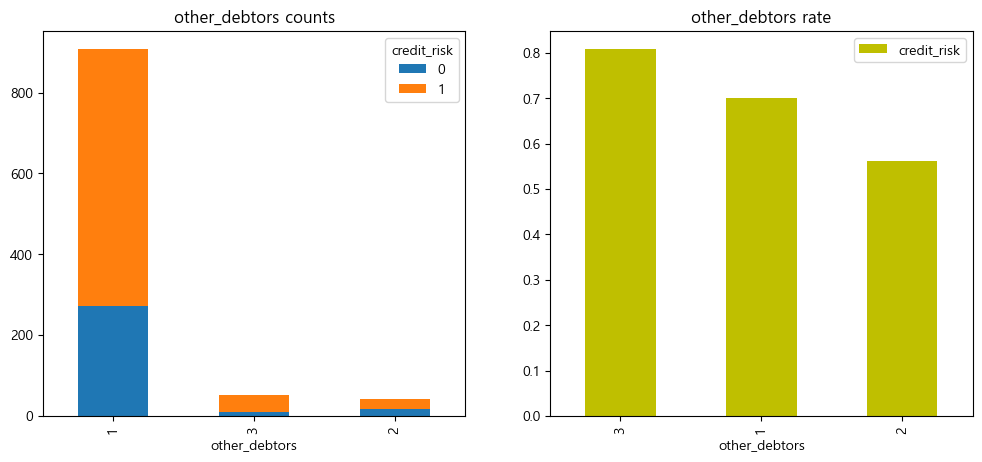

In [42]:
f,a = plt.subplots(1,2,figsize = (12,5))
a[0].set_title('other_debtors counts')
other_debtors_order = df['other_debtors'].value_counts().index 
df.groupby(by=['other_debtors', 'credit_risk']).size().unstack().loc[other_debtors_order].plot.bar(ax =a[0],stacked = True)
df[['other_debtors', 'credit_risk']].groupby(by=['other_debtors']).mean().sort_values(by = 'credit_risk',ascending = False).plot.bar(stacked=True,ax =a[1],color = 'y')
a[1].set_title('other_debtors rate');

# other_installment_plans

+ 1: 은행 (bank) - 다른 은행에서 할부 계획을 가지고 있음
+ 2: 상점 (stores) - 상점에서 할부 계획을 가지고 있음
+ 3: 없음 (none) - 다른 할부 계획이 없음

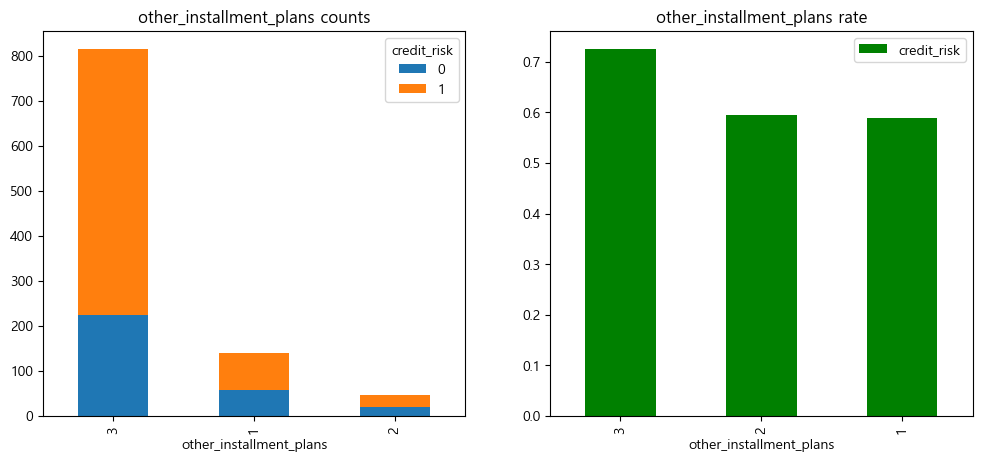

In [43]:
f,a = plt.subplots(1,2,figsize = (12,5))
a[0].set_title('other_installment_plans counts')
other_installment_plans_order = df['other_installment_plans'].value_counts().index 
df.groupby(by=['other_installment_plans', 'credit_risk']).size().unstack().loc[other_installment_plans_order].plot.bar(ax =a[0],stacked = True)
df[['other_installment_plans', 'credit_risk']].groupby(by=['other_installment_plans']).mean().sort_values(by = 'credit_risk',ascending = False).plot.bar(stacked=True,ax =a[1],color = 'g')
a[1].set_title('other_installment_plans rate');

In [54]:
# 이진형 변수 0,1 로 처리 이게 예 아니요로 정확히 함
# telephone
# foreign_worker
d_binary = {1 : 1, 2: 0}
df['telephone'] = df['telephone'].map(d_binary)
df['foreign_worker'] = df['foreign_worker'].map(d_binary)
print(df.shape)

(1000, 21)


Text(0.5, 1.0, 'telephone')

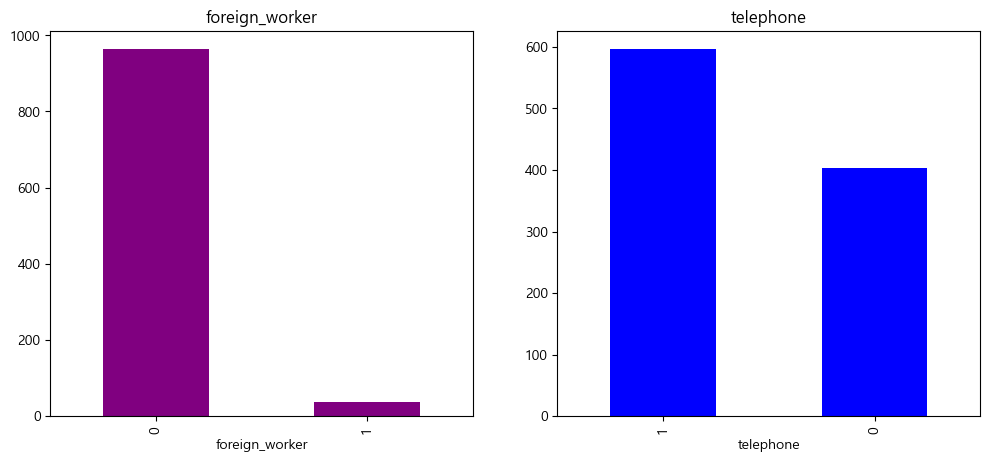

In [47]:
binary = df[['foreign_worker','telephone']]
f,a = plt.subplots(1,2,figsize = (12,5))
binary['foreign_worker'].value_counts().plot.bar(ax= a[0],color = 'purple') 
binary['telephone'].value_counts().plot.bar(ax= a[1],color = 'blue')  
a[0].set_title('foreign_worker')
a[1].set_title('telephone')

<Axes: xlabel='foreign_worker', ylabel='count'>

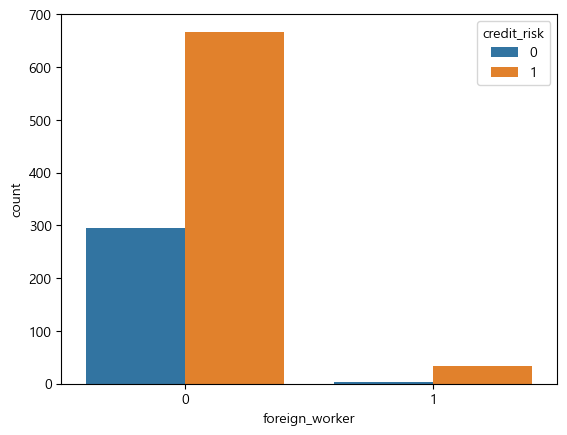

In [48]:
sns.countplot(data =df , x = 'foreign_worker',hue = 'credit_risk')

Text(0.5, 1.0, 'foreign_worker vs credit_risk')

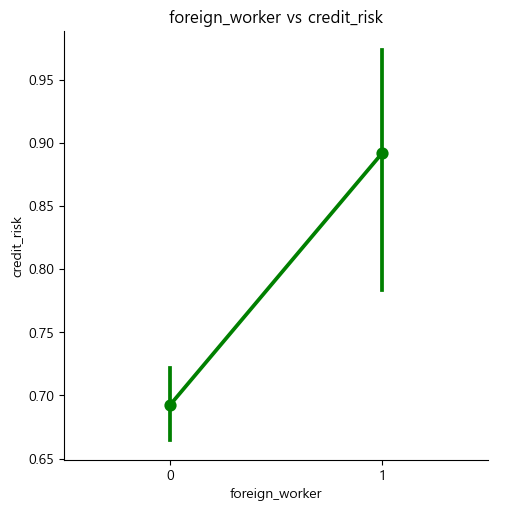

In [49]:
sns.catplot(data= df, x = 'foreign_worker', y = 'credit_risk' ,kind='point',color = 'g')
plt.title('foreign_worker vs credit_risk')

Text(0.5, 1.0, 'telephone vs credit_risk')

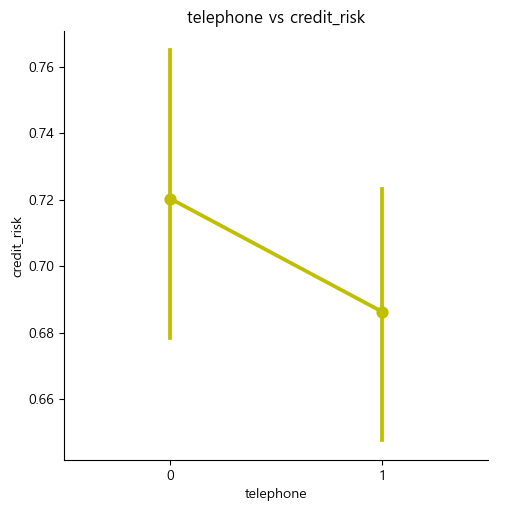

In [50]:
sns.catplot(data= df, x = 'telephone', y = 'credit_risk',kind='point',color = 'y')
plt.title('telephone vs credit_risk')

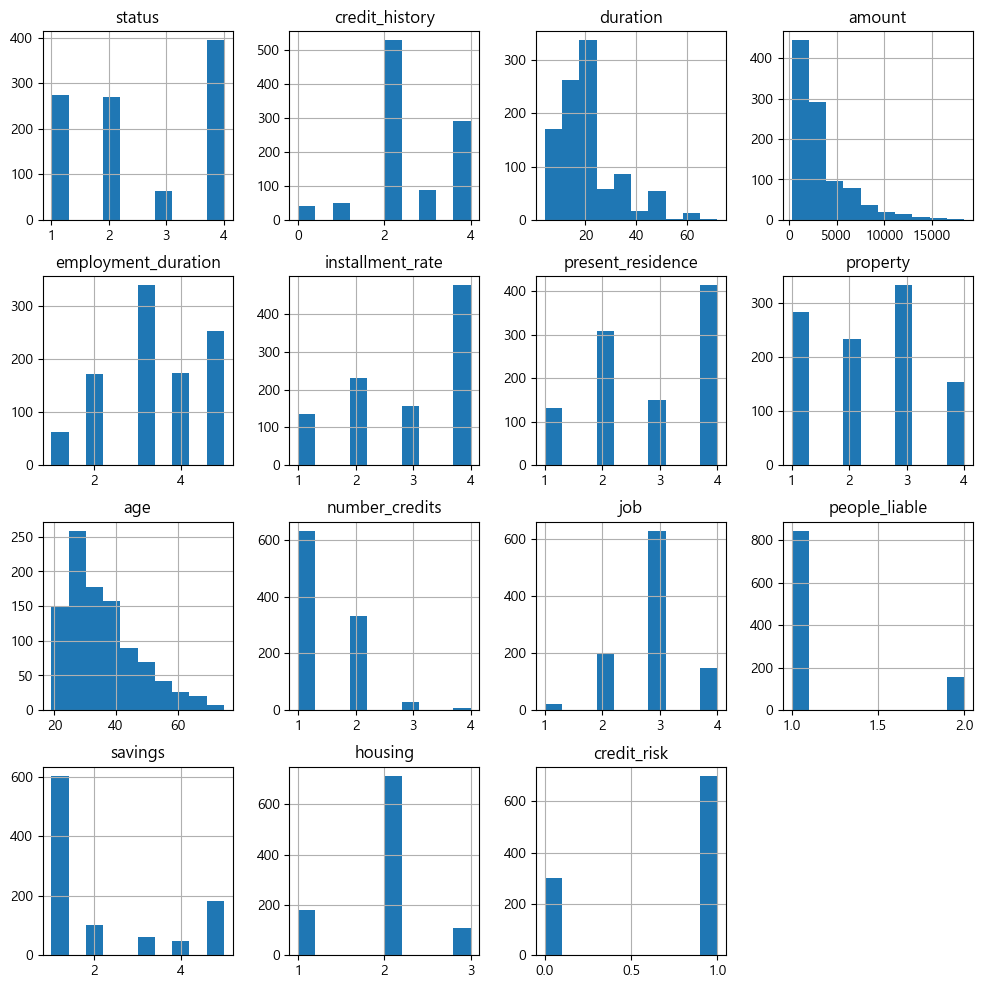

In [55]:
# 연속형 변수 및 서순형 변수 분포 확인
df_order = df[['status','credit_history','duration','amount','employment_duration','installment_rate','present_residence','property','age','number_credits','job','people_liable','savings','housing','credit_risk']]
df_order.hist(figsize=(12,12));

In [52]:
pd.concat([df[['telephone','foreign_worker']] , df_order],axis = 1)

,telephone,foreign_worker,status,credit_history,duration,amount,employment_duration,installment_rate,present_residence,property,age,number_credits,job,people_liable,savings,housing,credit_risk
0,1,0,1,4,18,1049,2,4,4,2,21,1,3,1,1,1,1
1,1,0,1,4,9,2799,3,2,2,1,36,2,3,2,1,1,1
2,1,0,2,2,12,841,4,2,4,1,23,1,2,1,2,1,1
3,1,1,1,4,12,2122,3,3,2,1,39,2,2,2,1,1,1
4,1,1,1,4,12,2171,3,4,4,2,38,2,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,2,24,1987,3,2,4,1,21,1,2,2,1,1,0
996,1,0,1,2,24,2303,5,4,1,1,45,1,3,1,1,2,0
997,0,0,4,4,21,12680,5,4,4,4,30,1,4,1,5,3,0
998,0,0,2,2,12,6468,1,2,1,4,52,1,4,1,5,2,0


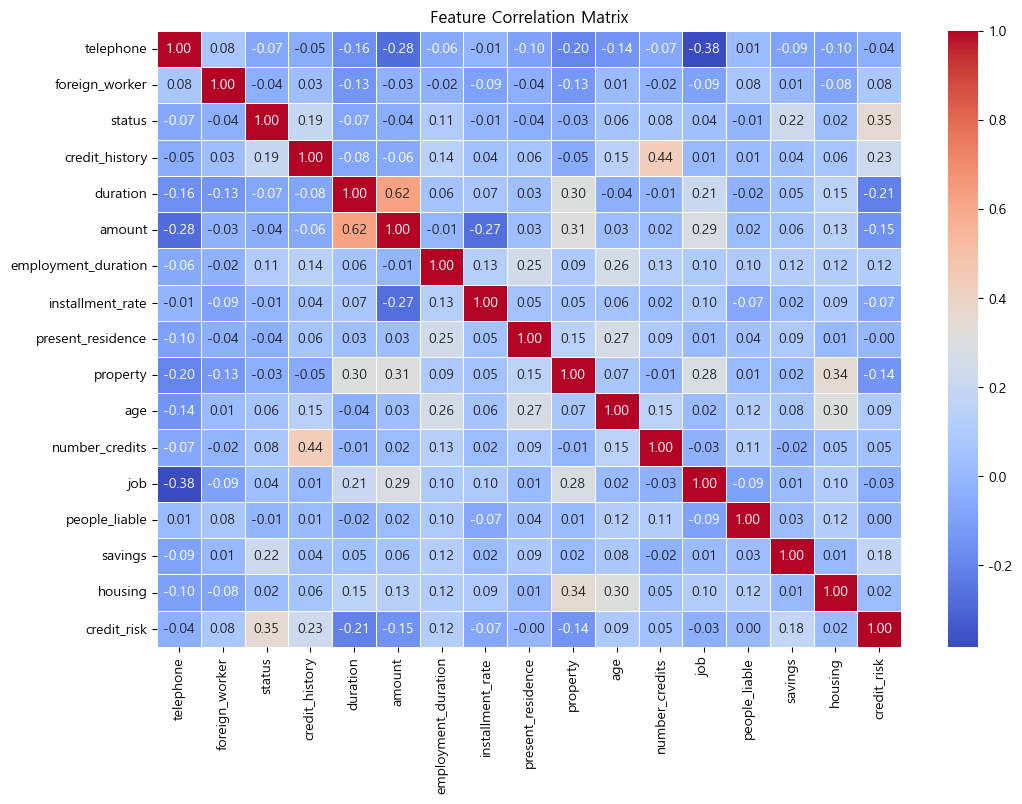

In [53]:
plt.figure(figsize=(12, 8))
sns.heatmap(pd.concat([df[['telephone','foreign_worker']] , df_order],axis = 1).corr(), annot=True, cmap='coolwarm', linewidths=0.5,fmt = '.2f')
plt.title('Feature Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'VIF for Each Feature')

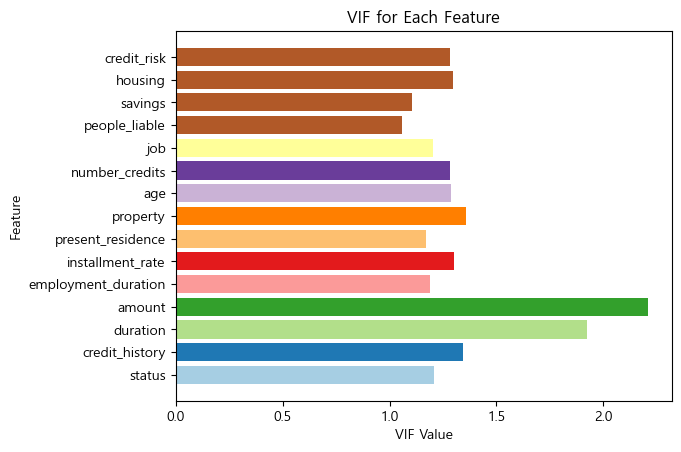

In [54]:
# 다중 공선성 계산 vif
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
# VIF 계산 함수
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# X 데이터프레임에 상수항 추가
X_with_const = sm.add_constant(df_order)

# VIF 계산
vif_data = calculate_vif(X_with_const)
vif_data = vif_data.drop(vif_data[vif_data['Feature'] == 'const'].index)
plt.barh(vif_data['Feature'], vif_data['VIF'],color = plt.cm.Paired(range(len(vif_data))))
plt.xlabel('VIF Value')
plt.ylabel('Feature')
plt.title('VIF for Each Feature')

# 연속 변수

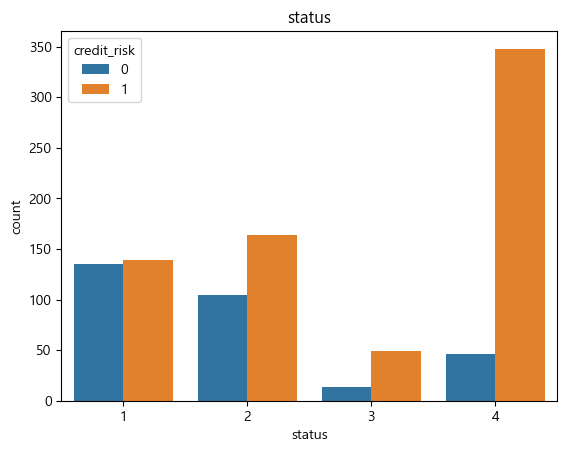

In [55]:
sns.countplot(data =df, x = 'status',hue = 'credit_risk')
plt.title('status');
# 잔고가 많을 수 록 잘 갚는다

In [56]:
def scatter(x_name,y_name):
    plt.scatter(df[x_name],df[y_name])
    plt.title(f'{x_name} vs {y_name}')
    plt.show()

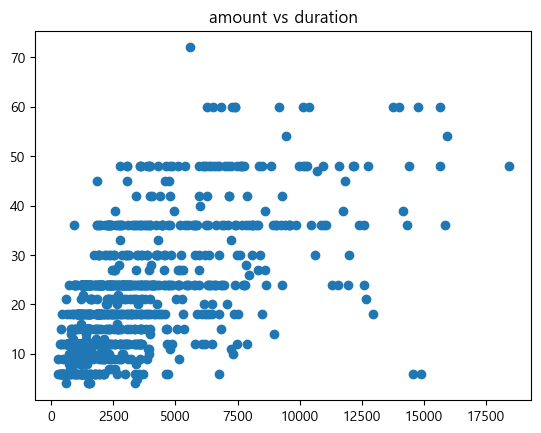

In [57]:
scatter('amount','duration')
#빌린돈이 많으면 갚는데 오래 걸린다.

# property

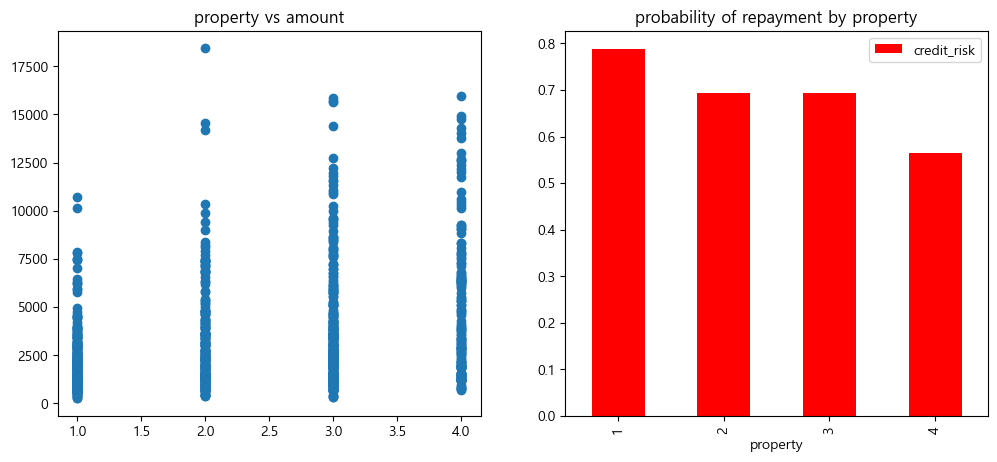

In [58]:
f,a = plt.subplots(1,2,figsize = (12,5))
a[0].scatter(df['property'],df['amount'])
a[0].set_title('property vs amount')
df[['credit_risk','property']].groupby('property').mean().plot.bar(ax = a[1],color = 'r')
#pd.crosstab(df['property'],df['credit_risk']).plot.bar(stacked = True , ax = a[1])
a[1].set_title('probability of repayment by property');
# 자산이 많으면 빌리는 돈도 많다.
# 자산이 많을수록 값을 확률이 적어짐

Text(0.5, 1.0, 'probability of repayment by credit_history')

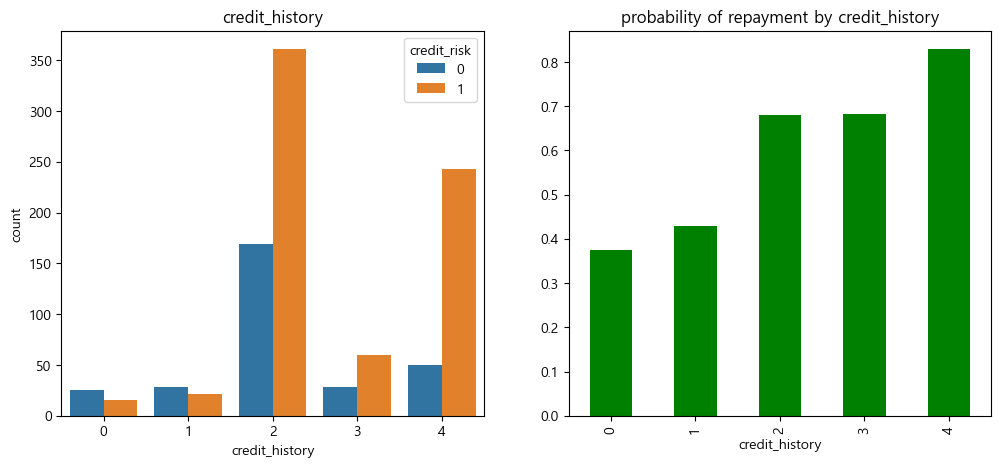

In [59]:
f,a = plt.subplots(1,2,figsize = (12,5))
sns.countplot(data =df, x = 'credit_history',hue = 'credit_risk',ax = a[0])
a[0].set_title('credit_history');

df.groupby('credit_history')['credit_risk'].mean().plot.bar(ax = a[1],color = 'g')
a[1].set_title('probability of repayment by credit_history')
#과거 대출기록이 있다면, 갚을 확률이 증가함

# age

<Axes: xlabel='credit_risk', ylabel='age'>

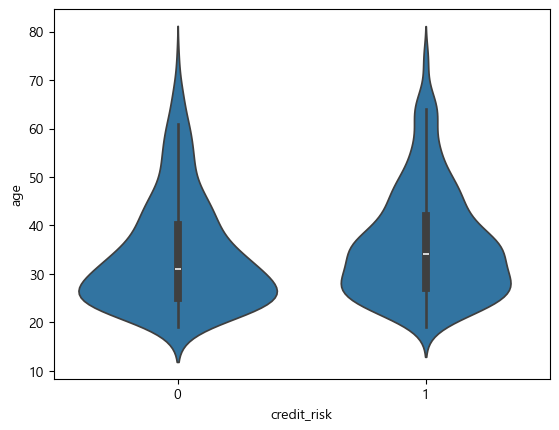

In [60]:
sns.violinplot(df,x='credit_risk', y = 'age')
#나이에 따라 상환 정도는 차이가 나지 않음

Text(0.5, 1.0, 'amount vs credit_risk')

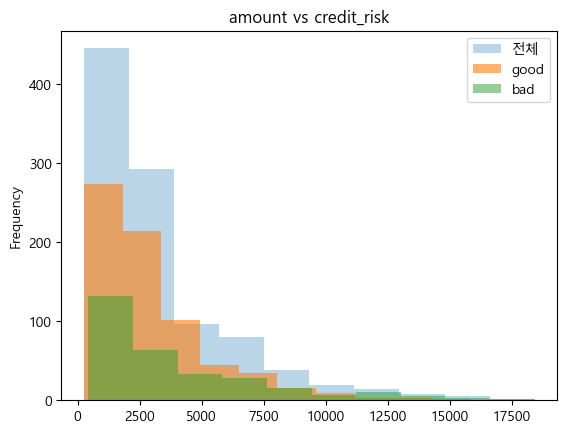

In [61]:
# 빌린 양이 많으면 못 값을 확률이 증가
df['amount'].plot.hist(alpha = 0.3,label = '전체')
df[df['credit_risk'] == 1]['amount'].plot.hist(alpha = 0.6,label = 'good')
df[df['credit_risk'] == 0]['amount'].plot.hist(alpha = 0.5,label = 'bad')
plt.legend();
plt.title('amount vs credit_risk')

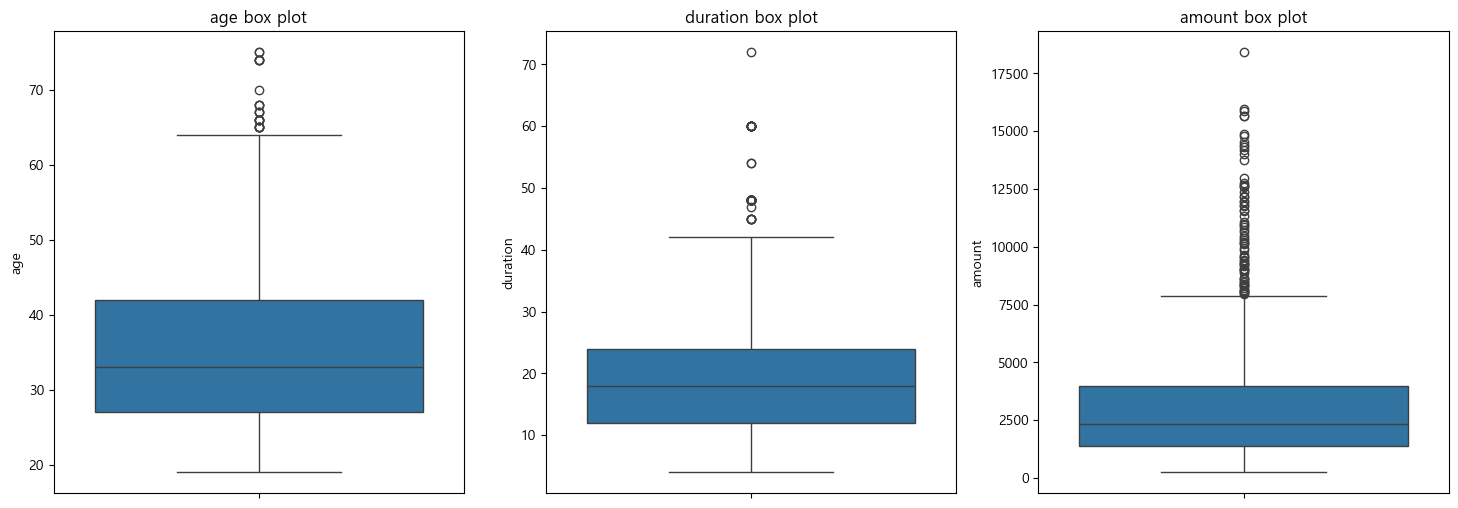

In [62]:
f,a = plt.subplots(1,3,figsize = (18,6))
df_continuous = df[['age','duration','amount']]
sns.boxplot(df_continuous['age'], ax = a[0])
sns.boxplot(df_continuous['duration'],ax = a[1])
sns.boxplot(df_continuous['amount'],ax = a[2])

for i,x in enumerate(df_continuous.columns):
    a[i].set_title(f'{x} box plot')
# 이상치 존재 --> 로버스트 스케일링

# 데이터 전처리 
+ 범주형 변수 명목변수 인코딩
+ 이진형 변수가 1,2로 인코딩 된 것 0,1로 다시 맵핑

# purpose 줄이기
+ 일상적인 소비: 가전제품, 라디오/텔레비전, 휴가
  + 5: 가전제품 (domestic appliances)
  + 4: 라디오 또는 텔레비전 (radio/television)
  + 8: 휴가 (vacation)

+ 자산 구매: 자동차 (신차/중고차), 가구/장비
  + 1: 자동차 (신차 구매) (car (new))
  + 2: 자동차 (중고차 구매) (car (used))
  + 3: 가구 또는 장비 (furniture/equipment)

+ 자기 개발 및 학습: 교육, 재교육
   + 7: 교육 (education)
   + 9: 재교육 (retraining)

+ 비상 상황 및 수리: 수리, 기타
  + 6: 수리 (repairs)
  + 0: 기타 (others)
+ 사업 목적: 사업
  + 10: 사업 (business_)

In [63]:
# purpose 줄이기
d =  {5: "Daily" , 4 :'Daily' , 8 : 'Daily' , 1: 'Asset', 2: 'Asset', 3: "Asset", 7: 'Edu', 9: "Edu" , 6: "Emergency", 0 : "Emergency", 10: "Business"}
df['purpose'] = df['purpose'].map(d)
df['purpose']

0          Asset
1      Emergency
2            Edu
3      Emergency
4      Emergency
         ...    
995        Asset
996    Emergency
997    Emergency
998        Asset
999        Asset
Name: purpose, Length: 1000, dtype: object

In [64]:
# 범주형 변수
#purpose
#personal_status_sex
#other_debtors
#other_installment_plans

In [65]:
# 다중공선성 제거를 위해 기준변수 제거
df = pd.concat([
    df, 
    pd.get_dummies(df['purpose'], prefix='purpose', dtype=int,drop_first=True),
    pd.get_dummies(df['personal_status_sex'], prefix='personal_status_sex', dtype=int,drop_first=True),
    pd.get_dummies(df['other_debtors'], prefix='other_debtors', dtype=int,drop_first=True),
    pd.get_dummies(df['other_installment_plans'], prefix='other_installment_plans', dtype=int,drop_first=True)
], axis=1)
df.drop(['purpose','personal_status_sex',"other_debtors",'other_installment_plans'],axis = 1, inplace = True)
df.shape

(1000, 28)

In [66]:
df_continuous.describe()

,age,duration,amount
count,1000.00000,1000.000000,1000.00000
mean,35.54200,20.903000,3271.24800
std,11.35267,12.058814,2822.75176
min,19.00000,4.000000,250.00000
25%,27.00000,12.000000,1365.50000
50%,33.00000,18.000000,2319.50000
75%,42.00000,24.000000,3972.25000
max,75.00000,72.000000,18424.00000


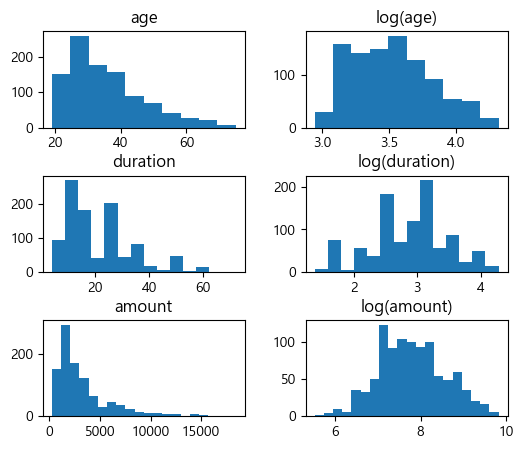

In [67]:
f,a = plt.subplots(3,2,figsize = (6,5))
a[0,0].hist(df['age'],bins = 10)
a[0,0].set_title('age')
a[0,1].hist(np.log(df['age']),bins = 10)
a[0,1].set_title('log(age)')
a[1,0].hist(df['duration'],bins = 14)
a[1,0].set_title('duration')
a[1,1].hist(np.log(df['duration']),bins = 14)
a[1,1].set_title('log(duration)')
a[2,0].hist(df['amount'],bins = 20)
a[2,0].set_title('amount')
a[2,1].hist(np.log(df['amount']),bins = 20)
a[2,1].set_title('log(amount)')
f.subplots_adjust(hspace=0.5, wspace=0.3)

In [68]:
df['age'] = np.log(df['age'])
df['amount'] = np.log(df['amount'])
df['duration'] = np.log(df['duration'])
df

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,present_residence,property,age,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,purpose_Business,purpose_Daily,purpose_Edu,purpose_Emergency,personal_status_sex_2,personal_status_sex_3,personal_status_sex_4,other_debtors_2,other_debtors_3,other_installment_plans_2,other_installment_plans_3
0,1,2.890372,4,6.955593,1,2,4,4,2,3.044522,1,1,3,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,1,2.197225,4,7.937017,1,3,2,2,1,3.583519,1,2,3,2,1,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,2.484907,2,6.734592,2,4,2,4,1,3.135494,1,1,2,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1
3,1,2.484907,4,7.660114,1,3,3,2,1,3.663562,1,2,2,2,1,1,1,0,0,0,1,0,1,0,0,0,0,1
4,1,2.484907,4,7.682943,1,3,4,4,2,3.637586,2,2,2,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,3.178054,2,7.594381,1,3,2,4,1,3.044522,1,1,2,2,1,0,0,0,0,0,0,0,1,0,0,0,0,1
996,1,3.178054,2,7.741968,1,5,4,1,1,3.806662,2,1,3,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1
997,4,3.044522,4,9.447781,5,5,4,4,4,3.401197,3,1,4,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
998,2,2.484907,2,8.774622,5,1,2,1,4,3.951244,2,1,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


# 모델 학습 및 스케일링

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df.drop(['credit_risk'],axis= 1)
y = df['credit_risk']
train_input, test_input, train_target, test_target  = train_test_split(x,y,test_size= 0.2,stratify=y,random_state=42)
train_input,val_input,train_target,val_target = train_test_split(train_input,train_target,test_size= 0.2,stratify=train_target,random_state=42)
print(f'train : {train_input.shape}')
print(f'validation : {val_input.shape}')
print(f'test : {test_input.shape}')

train : (640, 27)
validation : (160, 27)
test : (200, 27)


In [70]:
#표준화 적용
scaler = StandardScaler().fit(train_input)
scaled_train_input = scaler.transform(train_input)
scaled_train_input = pd.DataFrame(scaled_train_input,index = train_input.index, columns=x.columns)

scaled_val_input = scaler.transform(val_input)
scaled_val_input = pd.DataFrame(scaled_val_input,index = val_input.index, columns=x.columns)

scaled_test_input = scaler.transform(test_input)
scaled_test_input = pd.DataFrame(scaled_test_input,index = test_input.index, columns=x.columns)


In [71]:
import statsmodels.api as sm

# 상수항 추가 (절편 포함)
train_input_const = sm.add_constant(scaled_train_input)

# statsmodels 로지스틱 회귀 모델 구축
lr = sm.Logit(train_target, train_input_const)

# 모델 적합
result = lr.fit()
result.summary()# 모델 요약 출력

Optimization terminated successfully.
         Current function value: 0.469690
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            credit_risk   No. Observations:                  640
Model:                          Logit   Df Residuals:                      612
Method:                           MLE   Df Model:                           27
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                  0.2311
Time:                        00:23:46   Log-Likelihood:                -300.60
converged:                       True   LL-Null:                       -390.95
Covariance Type:            nonrobust   LLR p-value:                 1.098e-24
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.1778      0.114     10.345      0.000       0.955       1.401
status                        0.7253      0.111      6.545      0.000       0.508       0.942
duration                     -0.4790      0.153     -3.140      0.002      -0.778      -0.180
credit_history                0.5067      0.123      4.108      0.000       0.265       0.748
amount                        0.0270      0.165      0.164      0.870      -0.296       0.350
savings                       0.3522      0.118      2.980      0.003       0.121       0.584
employment_duration           0.1041      0.109      0.957      0.339      -0.109       0.317
installment_rate             -0.2232      0.124     -1.795      0.073      -0.467       0.021
present_residence             0.0324      0.113      0.287      0.774      -0.188       0.253
property                     -0.1690      0.123     -1.375      0.169      -0.410       0.072
age                           0.0114      0.122      0.093      0.926      -0.227       0.250
housing                       0.2805      0.118      2.374      0.018       0.049       0.512
number_credits               -0.1594      0.119     -1.341      0.180      -0.392       0.074
job                          -0.0296      0.117     -0.252      0.801      -0.259       0.200
people_liable                 0.0357      0.109      0.327      0.744      -0.178       0.249
telephone                    -0.1209      0.117     -1.037      0.300      -0.350       0.108
foreign_worker                0.3224      0.163      1.972      0.049       0.002       0.643
purpose_Business             -0.0125      0.090     -0.139      0.890      -0.190       0.164
purpose_Daily                 0.0029      0.110      0.026      0.979      -0.213       0.219
purpose_Edu                  -0.1136      0.107     -1.060      0.289      -0.324       0.096
purpose_Emergency            -0.4087      0.108     -3.787      0.000      -0.620      -0.197
personal_status_sex_2         0.1808      0.229      0.789      0.430      -0.268       0.630
personal_status_sex_3         0.3846      0.239      1.608      0.108      -0.084       0.853
personal_status_sex_4         0.1204      0.160      0.754      0.451      -0.193       0.433
other_debtors_2              -0.1064      0.096     -1.105      0.269      -0.295       0.082
other_debtors_3               0.1503      0.114      1.318      0.187      -0.073       0.374
other_installment_plans_2     0.0610      0.107      0.571      0.568      -0.149       0.271
other_installment_plans_3     0.2173      0.112      1.933      0.053      -0.003       0.438
=============================================================================================
"""

In [72]:
# 0.6이상 제거
droped_train_input = train_input_const.drop(['amount','present_residence','age','job','people_liable','purpose_Business','purpose_Daily','other_installment_plans_2'],axis = 1)

In [73]:
# statsmodels 로지스틱 회귀 모델 구축
lr = sm.Logit(train_target, droped_train_input)

# 모델 적합
result = lr.fit()
result.summary()# 모델 요약 출력

Optimization terminated successfully.
         Current function value: 0.470204
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            credit_risk   No. Observations:                  640
Model:                          Logit   Df Residuals:                      620
Method:                           MLE   Df Model:                           19
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                  0.2303
Time:                        00:23:46   Log-Likelihood:                -300.93
converged:                       True   LL-Null:                       -390.95
Covariance Type:            nonrobust   LLR p-value:                 3.031e-28
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.1759      0.114     10.354      0.000       0.953       1.398
status                        0.7227      0.110      6.582      0.000       0.507       0.938
duration                     -0.4618      0.115     -4.003      0.000      -0.688      -0.236
credit_history                0.5029      0.121      4.141      0.000       0.265       0.741
savings                       0.3554      0.118      3.016      0.003       0.124       0.586
employment_duration           0.1098      0.103      1.062      0.288      -0.093       0.312
installment_rate             -0.2299      0.105     -2.189      0.029      -0.436      -0.024
property                     -0.1720      0.118     -1.458      0.145      -0.403       0.059
housing                       0.2844      0.110      2.597      0.009       0.070       0.499
number_credits               -0.1498      0.116     -1.287      0.198      -0.378       0.078
telephone                    -0.1174      0.105     -1.115      0.265      -0.324       0.089
foreign_worker                0.3227      0.162      1.987      0.047       0.004       0.641
purpose_Edu                  -0.1086      0.106     -1.027      0.304      -0.316       0.099
purpose_Emergency            -0.4054      0.104     -3.896      0.000      -0.609      -0.201
personal_status_sex_2         0.1899      0.224      0.847      0.397      -0.249       0.629
personal_status_sex_3         0.4038      0.235      1.716      0.086      -0.057       0.865
personal_status_sex_4         0.1207      0.157      0.768      0.442      -0.187       0.429
other_debtors_2              -0.1151      0.094     -1.219      0.223      -0.300       0.070
other_debtors_3               0.1472      0.113      1.308      0.191      -0.073       0.368
other_installment_plans_3     0.1887      0.098      1.926      0.054      -0.003       0.381
=============================================================================================
"""

In [74]:
# 0.1 이상 제거
droped_train_input.drop(['employment_duration','property','number_credits','telephone','purpose_Edu','personal_status_sex_2','personal_status_sex_4','other_debtors_2','other_debtors_3'],axis = 1,inplace = True)

In [75]:
# statsmodels 로지스틱 회귀 모델 구축
lr = sm.Logit(train_target, droped_train_input)

# 모델 적합
result = lr.fit()
result.summary()# 모델 요약 출력

Optimization terminated successfully.
         Current function value: 0.480184
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            credit_risk   No. Observations:                  640
Model:                          Logit   Df Residuals:                      629
Method:                           MLE   Df Model:                           10
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                  0.2139
Time:                        00:23:47   Log-Likelihood:                -307.32
converged:                       True   LL-Null:                       -390.95
Covariance Type:            nonrobust   LLR p-value:                 1.019e-30
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.1603      0.112     10.341      0.000       0.940       1.380
status                        0.7030      0.108      6.500      0.000       0.491       0.915
duration                     -0.4993      0.109     -4.582      0.000      -0.713      -0.286
credit_history                0.4526      0.107      4.239      0.000       0.243       0.662
savings                       0.3689      0.114      3.228      0.001       0.145       0.593
installment_rate             -0.2025      0.102     -1.981      0.048      -0.403      -0.002
housing                       0.2243      0.102      2.196      0.028       0.024       0.425
foreign_worker                0.3360      0.161      2.087      0.037       0.020       0.651
purpose_Emergency            -0.4051      0.099     -4.084      0.000      -0.599      -0.211
personal_status_sex_3         0.2095      0.105      2.000      0.046       0.004       0.415
other_installment_plans_3     0.2115      0.095      2.220      0.026       0.025       0.398
=============================================================================================
"""

In [76]:
droped_train_input

,const,status,duration,credit_history,savings,installment_rate,housing,foreign_worker,purpose_Emergency,personal_status_sex_3,other_installment_plans_3
578,1.0,-1.256925,1.057069,1.382409,0.588572,-1.749745,0.126651,-0.209871,-0.632801,-1.119608,0.492665
227,1.0,1.116031,-0.429923,0.447164,-0.688329,0.925024,0.126651,-0.209871,1.580275,0.893170,0.492665
142,1.0,-0.465940,0.504806,-0.488081,1.865472,-0.858155,0.126651,-0.209871,-0.632801,-1.119608,0.492665
881,1.0,0.325046,-1.196150,-2.358571,-0.688329,0.925024,0.126651,-0.209871,-0.632801,0.893170,0.492665
443,1.0,1.116031,-0.310276,-0.488081,1.865472,0.925024,-1.758386,-0.209871,-0.632801,-1.119608,0.492665
...,...,...,...,...,...,...,...,...,...,...,...
189,1.0,0.325046,0.273235,-0.488081,-0.049879,-1.749745,0.126651,-0.209871,1.580275,-1.119608,-2.029778
757,1.0,-1.256925,-0.697252,-2.358571,-0.688329,0.925024,0.126651,-0.209871,1.580275,0.893170,-2.029778
931,1.0,-1.256925,-0.697252,-0.488081,-0.688329,0.033435,0.126651,-0.209871,1.580275,-1.119608,-2.029778
953,1.0,1.116031,1.706863,1.382409,-0.049879,-0.858155,-1.758386,-0.209871,-0.632801,-1.119608,0.492665


In [77]:
droped_train_input = droped_train_input.drop(['const'],axis = 1)
droped_val_input =scaled_val_input[['status','duration','credit_history','savings','installment_rate','housing','foreign_worker','purpose_Emergency','personal_status_sex_3','other_installment_plans_3']]
droped_test_input = scaled_test_input[['status','duration','credit_history','savings','installment_rate','housing','foreign_worker','purpose_Emergency','personal_status_sex_3','other_installment_plans_3']]

In [78]:
print(droped_train_input.shape)
print(droped_val_input.shape)
print(droped_test_input.shape)

(640, 10)
(160, 10)
(200, 10)


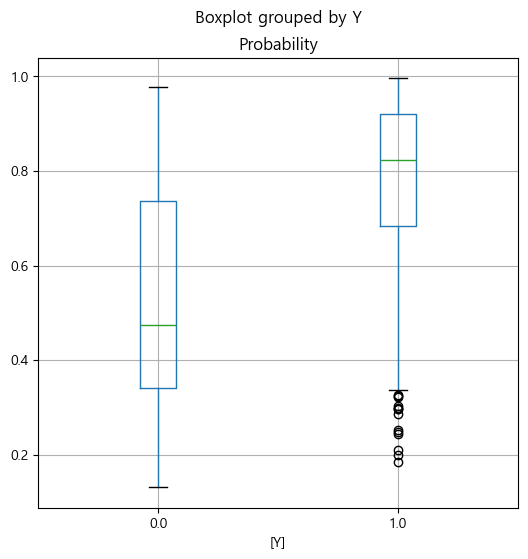

In [79]:
dummy = pd.DataFrame(np.column_stack([train_target, result.predict()]), columns=['Y', 'Probability'])
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
dummy.boxplot(by='Y', ax=ax);

In [80]:
lr1 = LogisticRegression().fit(scaled_train_input,train_target)
print(f'train accuracy : {lr1.score(scaled_train_input,train_target)}')
print(f'validation accuracy : {lr1.score(scaled_val_input,val_target)}')

train accuracy : 0.7953125
validation accuracy : 0.76875


In [81]:
lr2 = LogisticRegression().fit(droped_train_input,train_target)
print(f'train accuracy : {lr2.score(droped_train_input,train_target)}')
print(f'validation accuracy : {lr2.score(droped_val_input,val_target)}')

train accuracy : 0.78125
validation accuracy : 0.7625


In [82]:
lr2.coef_[0]

array([ 0.69566714, -0.4924748 ,  0.44798428,  0.3638278 , -0.199483  ,
        0.22052915,  0.3256743 , -0.39900419,  0.20666786,  0.2094493 ])

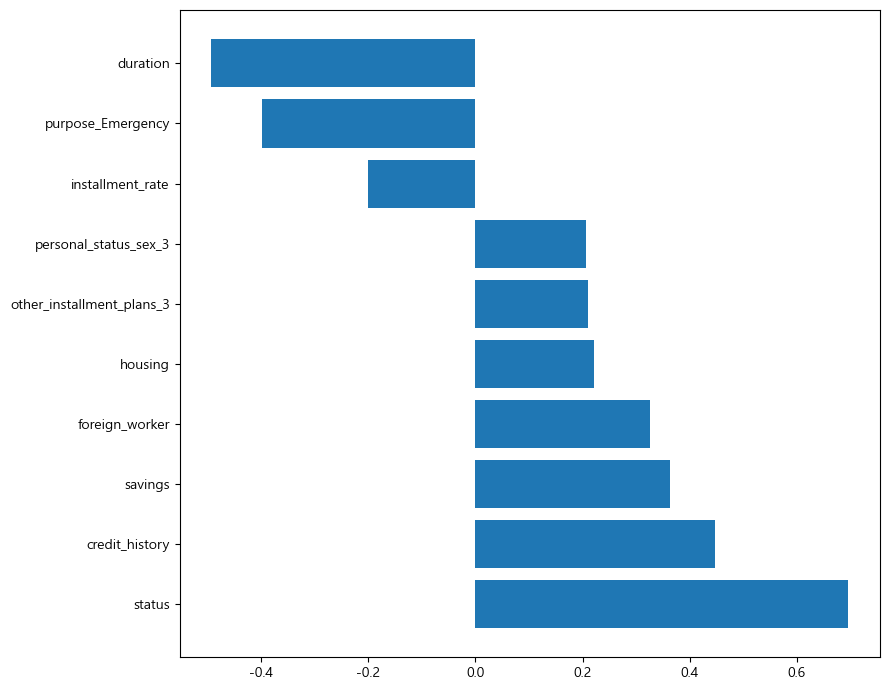

In [83]:
plot_coef(droped_train_input.columns,lr2.coef_[0])

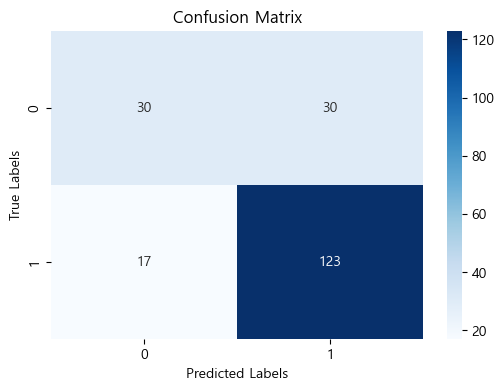

Accuracy: 0.765
Precision: 0.803921568627451
Recall: 0.8785714285714286
F1 Score: 0.8395904436860068


In [105]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_target, lr2.predict(droped_test_input))
# 혼돈행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 예측 수행
y_pred = lr2.predict(droped_test_input)

# 평가 지표 계산
accuracy = accuracy_score(test_target, y_pred)
precision = precision_score(test_target, y_pred)
recall = recall_score(test_target, y_pred)
f1 = f1_score(test_target, y_pred)

# 성능 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [85]:
# 금융 신뢰도 예측 상 돈을 못갚을 고객을 갚을 수 있다고 판단하여, 돈을 더 빌려주는 등 금융적인 문제가 발생하는 것에 대한 위험이 존재
# 즉 거짓 양성(FP)가 중요 즉, precision을 최적화 시키는 것이 이득임
# 따라서 컷오프를 증가 시켜 거짓 양성을 줄일 수 있게함

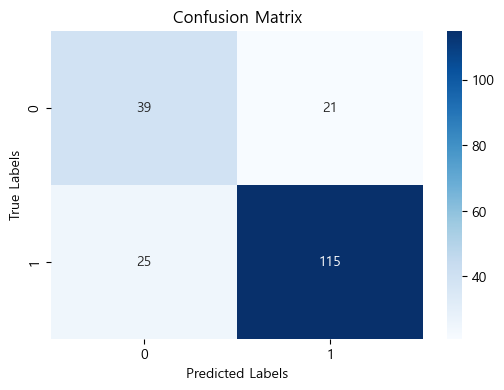

Accuracy: 0.77
Precision: 0.8455882352941176
Recall: 0.8214285714285714
F1 Score: 0.8333333333333334


In [86]:
# 예측 확률 구하기
y_pred_cutoff_prob = lr2.predict_proba(droped_test_input)[:, 1]  # 양성 클래스에 대한 확률

cutoff = 0.6

# 컷오프 기준으로 이진 분류 수행
y_pred_cutoff = (y_pred_cutoff_prob >= cutoff).astype(int)


conf_matrix = confusion_matrix(test_target, y_pred_cutoff)
# 혼돈행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 예측 수행

# 평가 지표 계산
accuracy = accuracy_score(test_target, y_pred_cutoff)
precision = precision_score(test_target, y_pred_cutoff)
recall = recall_score(test_target, y_pred_cutoff)
f1 = f1_score(test_target, y_pred_cutoff)

# 성능 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [87]:
X_train = pd.concat([scaled_train_input,scaled_val_input],axis = 0)
y_train = pd.concat([train_target,val_target],axis = 0)

C 값별 Precision 점수:
C=1000      , Precision=0.8059
C=100       , Precision=0.8059
C=10        , Precision=0.8073
C=1         , Precision=0.8032
C=0.1       , Precision=0.7910
C=0.01      , Precision=0.7000
Best Hyperparameter C: 10
Best Precision Score: 0.807262841207538


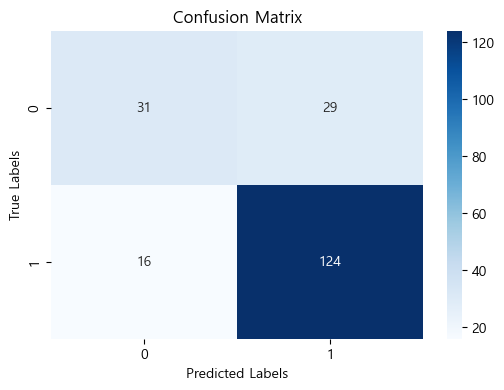

Accuracy: 0.775
Precision: 0.8104575163398693
Recall: 0.8857142857142857
F1 Score: 0.8464163822525598


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# 로지스틱 회귀 모델
logistic1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# 하이퍼파라미터 그리드
param_grid = {'C': [1000, 100, 10, 1, 0.1, 0.01]}

# 정밀도(Precision)를 기준으로 스코어러 생성
precision_scorer = make_scorer(precision_score, average='binary')

# GridSearchCV로 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=logistic1, param_grid=param_grid, scoring=precision_scorer, cv=5)
grid_search.fit(X_train, y_train)

# 각 C 값에 따른 교차 검증 점수 출력
print("C 값별 Precision 점수:")
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print(f"C={params['C']:<10}, Precision={mean_score:.4f}")
    
# 최적의 하이퍼파라미터와 점수 출력
print(f"Best Hyperparameter C: {grid_search.best_params_['C']}")
print(f"Best Precision Score: {grid_search.best_score_}")

best_model = grid_search.best_estimator_


y_pred = best_model.predict(scaled_test_input)
conf_matrix = confusion_matrix(test_target, y_pred)
# 혼돈행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# 평가 지표 계산
accuracy = accuracy_score(test_target, y_pred)
precision = precision_score(test_target, y_pred)
recall = recall_score(test_target, y_pred)
f1 = f1_score(test_target, y_pred)

# 성능 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

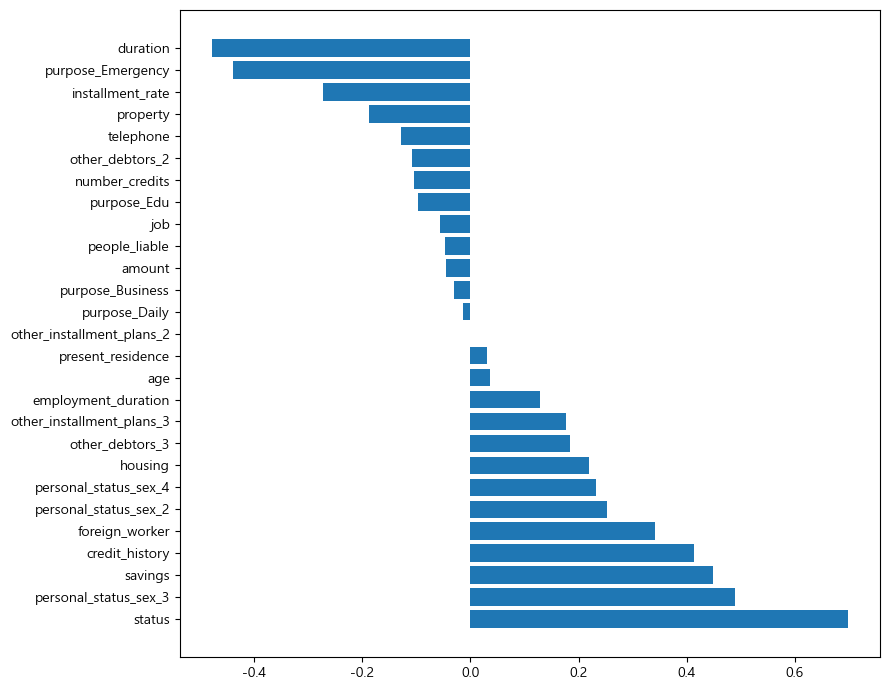

In [99]:
plot_coef(scaled_train_input.columns, best_model.coef_[0])

C 값별 Precision 점수:
C=1000      , Precision=0.8059
C=100       , Precision=0.8059
C=10        , Precision=0.8059
C=1         , Precision=0.8062
C=0.1       , Precision=0.8093
C=0.01      , Precision=0.8114
C=0.001     , Precision=0.8234
Best Hyperparameter C: 0.001
Best Precision Score: 0.8234007705591221


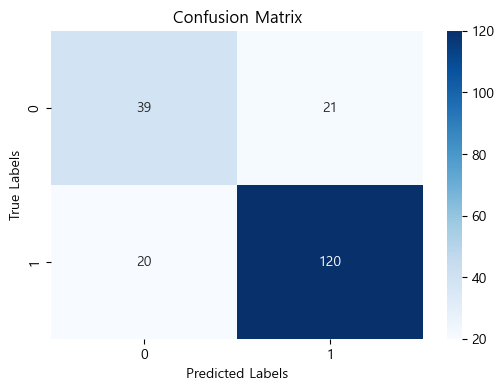

Accuracy: 0.795
Precision: 0.851063829787234
Recall: 0.8571428571428571
F1 Score: 0.8540925266903915


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 로지스틱 회귀 모델
logistic1 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)

# 하이퍼파라미터 그리드
param_grid = {'C': [1000, 100, 10, 1, 0.1, 0.01,0.001]}

# 정밀도(Precision)를 기준으로 스코어러 생성
precision_scorer = make_scorer(precision_score, average='binary')

# GridSearchCV로 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=logistic1, param_grid=param_grid, scoring=precision_scorer, cv=5)
grid_search.fit(X_train, y_train)


# 각 C 값에 따른 교차 검증 점수 출력
print("C 값별 Precision 점수:")
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print(f"C={params['C']:<10}, Precision={mean_score:.4f}")

# 최적의 하이퍼파라미터와 점수 출력
print(f"Best Hyperparameter C: {grid_search.best_params_['C']}")
print(f"Best Precision Score: {grid_search.best_score_}")


best_model = grid_search.best_estimator_

y_pred = best_model.predict(scaled_test_input)
conf_matrix = confusion_matrix(test_target, y_pred)
# 혼돈행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# 평가 지표 계산
accuracy = accuracy_score(test_target, y_pred)
precision = precision_score(test_target, y_pred)
recall = recall_score(test_target, y_pred)
f1 = f1_score(test_target, y_pred)

# 성능 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

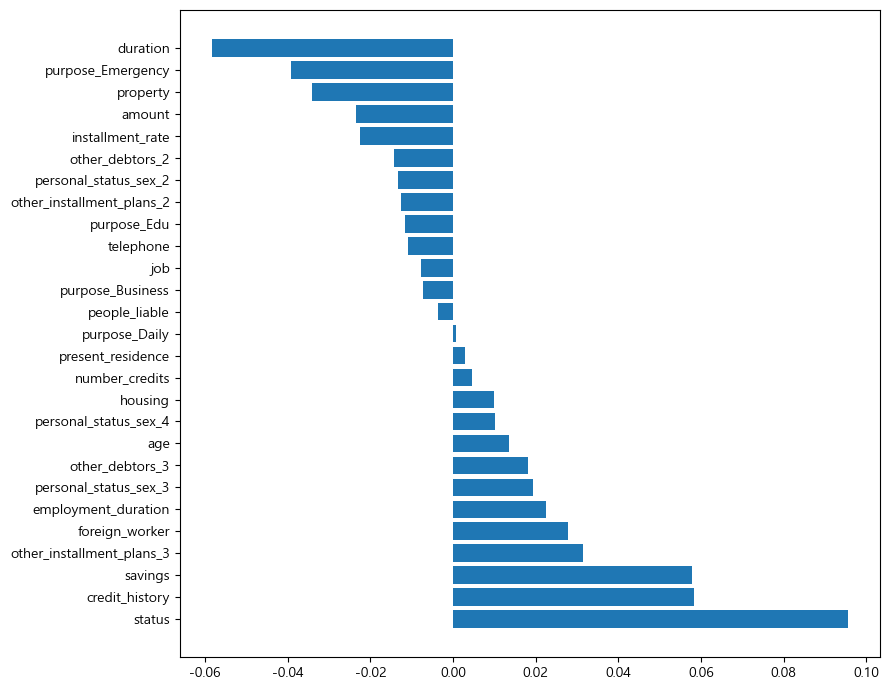

In [101]:
plot_coef(scaled_train_input.columns, best_model.coef_[0])

Best Hyperparameter C: 10
Best Hyperparameter l1_ratio: 0.9


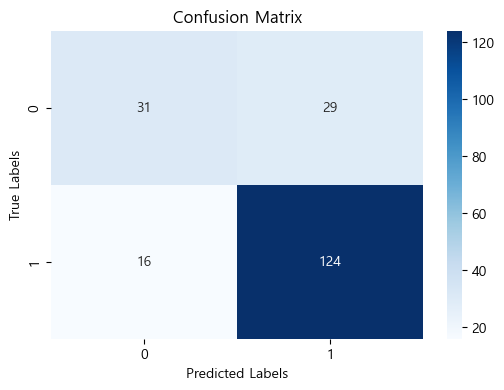

Accuracy: 0.775
Precision: 0.8104575163398693
Recall: 0.8857142857142857
F1 Score: 0.8464163822525598


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# 로지스틱 회귀 모델 (Elastic Net)
logistic3 = LogisticRegression(penalty='elasticnet', solver='saga', random_state=42, max_iter=10000)

# 하이퍼파라미터 그리드
param_grid = {
    'C': [1000, 100, 10, 1, 0.1, 0.01],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Elastic Net의 L1과 L2 비율 조정
}

# 정밀도(Precision)를 기준으로 스코어러 생성
precision_scorer = make_scorer(precision_score, average='binary', zero_division=0)

# GridSearchCV로 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=logistic3, param_grid=param_grid, scoring=precision_scorer, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 점수 출력
print(f"Best Hyperparameter C: {grid_search.best_params_['C']}")
print(f"Best Hyperparameter l1_ratio: {grid_search.best_params_['l1_ratio']}")


best_model = grid_search.best_estimator_

y_pred = best_model.predict(scaled_test_input)
conf_matrix = confusion_matrix(test_target, y_pred)
# 혼돈행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# 평가 지표 계산
accuracy = accuracy_score(test_target, y_pred)
precision = precision_score(test_target, y_pred)
recall = recall_score(test_target, y_pred)
f1 = f1_score(test_target, y_pred)

# 성능 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

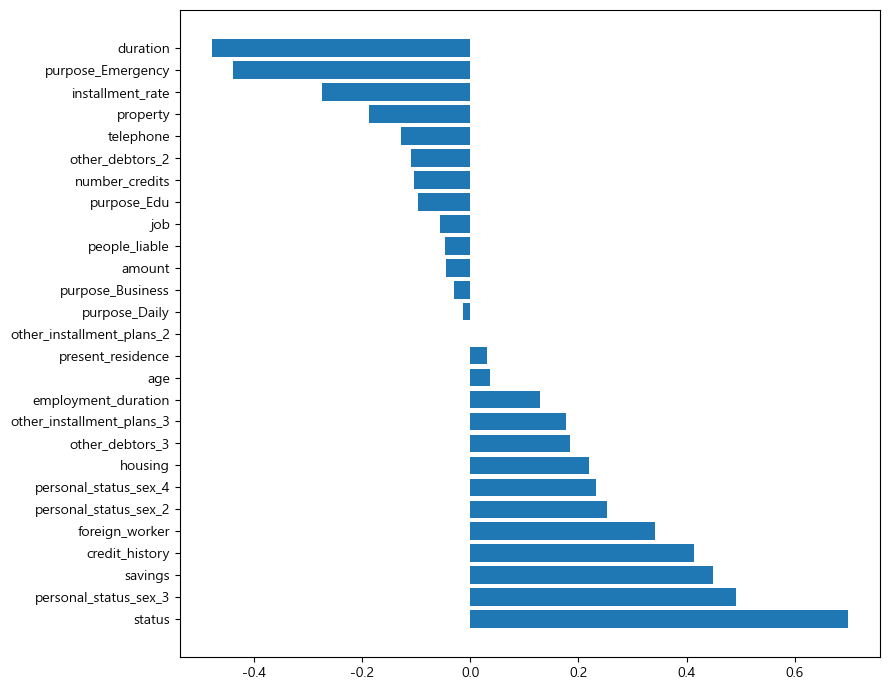

In [107]:
plot_coef(scaled_train_input.columns, best_model.coef_[0])

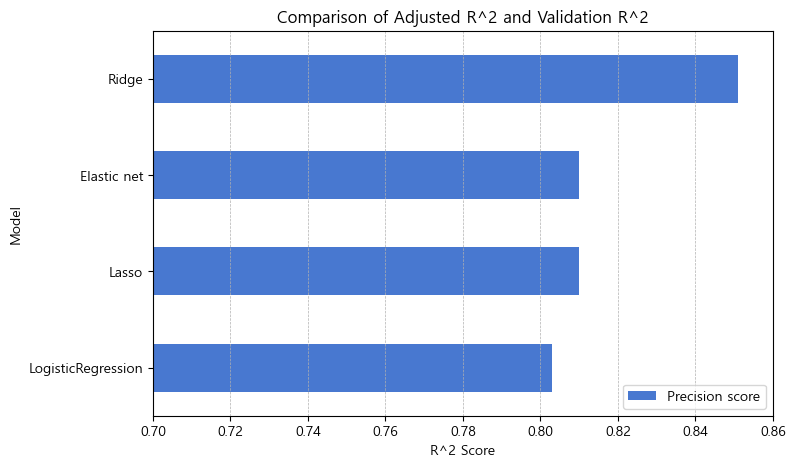

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
accuracy = pd.DataFrame({
    "Precision score": [0.803, 0.810, 0.851, 0.810],
},index = ['LogisticRegression','Lasso','Ridge','Elastic net'])


# Define soft "muted" colors from Seaborn
colors = sns.color_palette("muted", n_colors=4)

ax = accuracy.sort_values('Precision score').plot.barh(figsize=(8, 5), legend=True,color = colors)
plt.title("Comparison of Adjusted R^2 and Validation R^2")
plt.xlabel("R^2 Score")
plt.ylabel("Model")
plt.xlim(0.7, 0.86)
plt.grid(axis='x', linestyle='--', linewidth=0.5)

plt.show()